# Partial Convolution을 이용한 content awere/transform

In [4]:
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from libs.pconv_model import PConvUnet
from libs.util import random_mask, ImageChunker
%matplotlib inline

# SETTINGS
SAMPLE_IMAGE = 'images/my_bike.jpg'
BATCH_SIZE = 4

Using TensorFlow backend.


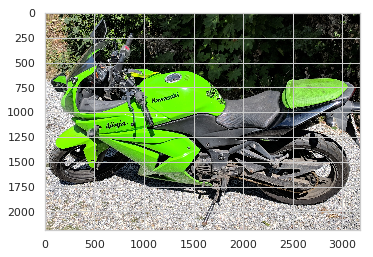

In [6]:
plt.imshow(Image.open(SAMPLE_IMAGE))
plt.show()

In [7]:
from libs.pconv_model import PConvUnet

model = PConvUnet(vgg_weights=None, inference_only=True)
model.load("../pconv_imagenet.h5", train_bn=False)

Instructions for updating:
Colocations handled automatically by placer.


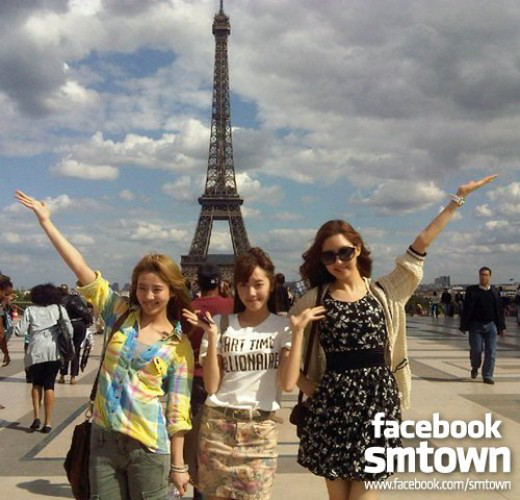

In [107]:

Image.open('/Users/by/Desktop/Untitled-1-02.jpg')

In [104]:
def inference(path, mask_path, save_path=None):
    img = Image.open(path)
    mask = Image.open(mask_path)
    if img.size[0]>512:
        size = (512, int(img.size[1]/img.size[0]*512))
        img = img.resize(size, Image.BICUBIC)
        mask = mask.resize(size, Image.NEAREST)
    if img.size[1]>512:
        size = (int(img.size[0]/img.size[1]*512), 512)
        img = img.resize(size, Image.BICUBIC)
        mask = mask.resize(size, Image.NEAREST)
        
    x = np.ones((1, 512, 512, 3))
    x[0, :img.size[1], :img.size[0], :] = np.array(img)/255.
    
    x_mask = np.ones((1, 512, 512, 3))
    x_mask[0, :mask.size[1], :mask.size[0], :] = np.where(np.array(mask)>250, 1, 0).astype('float')
    x[mask==0] = 1
    
    x_inpainted = np.array(model.predict([x, x_mask]).squeeze()*255., dtype='uint8')[:size[1], :size[0], :]
    
    # Visualize
    
    plt.figure(figsize=(20, 10))
    plt.subplot('141')
    plt.imshow(np.array(img))
    plt.subplot('142')
    plt.imshow(x[:, :size[1], :size[0], :].squeeze(), vmin=0, vmax=1)
    plt.subplot('143')
    plt.imshow(x_mask[:, :size[1], :size[0], :].squeeze(), vmin=0, vmax=1)
    plt.subplot('144')
    plt.imshow(np.array(model.predict([x, x_mask]).squeeze()*255., dtype='uint8')[:size[1], :size[0], :])
    plt.show()
    
    # save
    
    Image.fromarray(x_inpainted).save(save_path)

In [92]:
path = './images/test_input.png'
mask_path = './images/test_mask.jpg'

- 이미지 배경에 제거할 부분(로고, 사람) 마스크 지정
- 마스크 부분 주변 내용을 인식해서 자연스럽게 변환

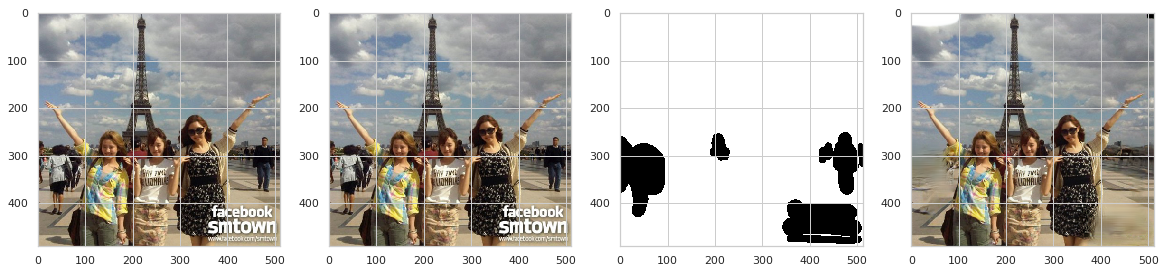

In [105]:
inference(path, mask_path, save_path='./images/test_output.png')